# Loading the packages

In [1]:
pip install plotly==4.7.1

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

pd.set_option('display.max_columns', 100)


RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation



RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False

import os


# Reading the data

In [7]:
dataset=pd.read_csv('creditcard.csv.zip')
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Checking the data

In [8]:
print("Credit Card Fraud Detection data -  rows:",dataset.shape[0]," columns:", dataset.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


# Glimpse the data

In [9]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Check the missing data

In [11]:
total = dataset.isnull().sum().sort_values(ascending = False)
percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,Amount,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data unbalance

In [12]:
temp = dataset["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

# Data exploration:

# Transactions in time

In [13]:
class_0 = dataset.loc[dataset['Class'] == 0]["Time"]
class_1 = dataset.loc[dataset['Class'] == 1]["Time"]
#plt.figure(figsize = (14,4))
#plt.title('Credit Card Transactions Time Density Plot')
#sns.set_color_codes("pastel")
#sns.distplot(class_0,kde=True,bins=480)
#sns.distplot(class_1,kde=True,bins=480)
#plt.show()
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

# Transactions amount

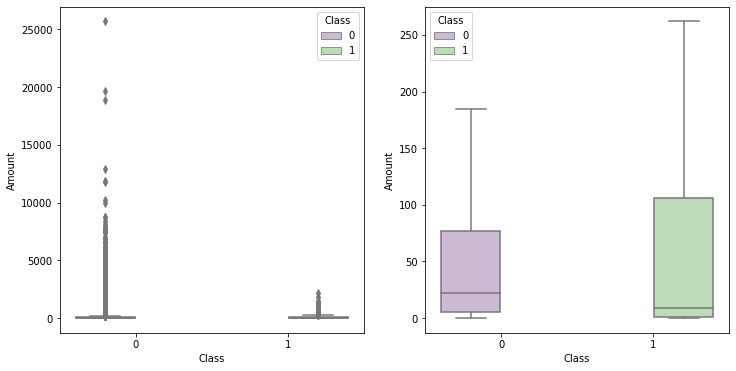

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=dataset, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=dataset, palette="PRGn",showfliers=False)
plt.show();

In [15]:
tmp = dataset[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
fraud = dataset.loc[dataset['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

# Features correlation

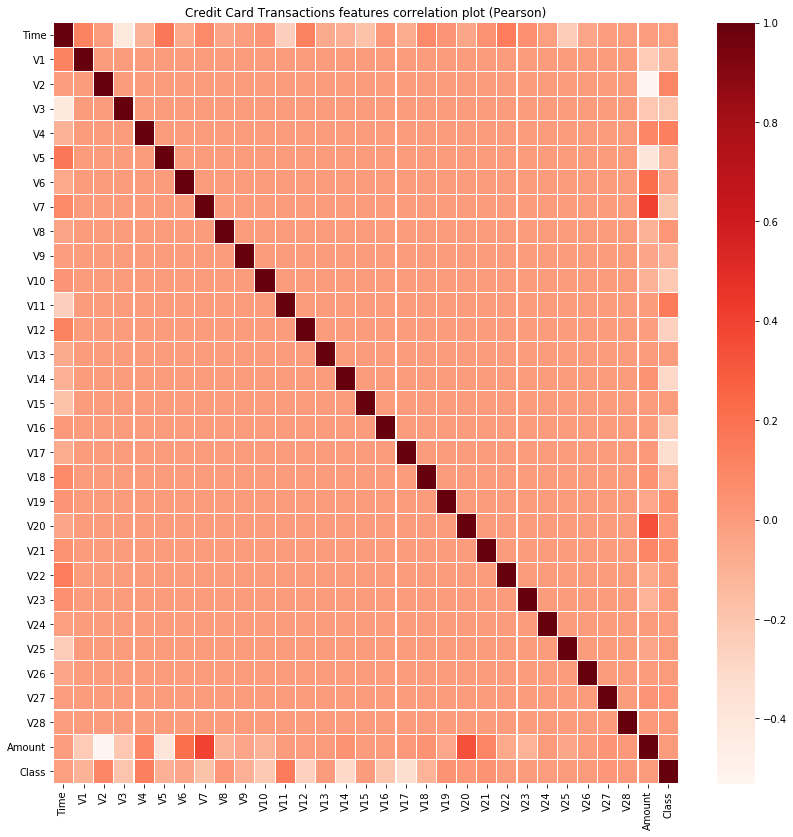

In [18]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = dataset.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

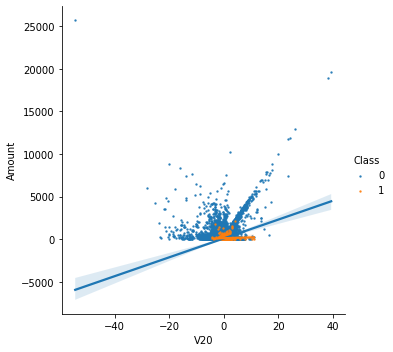

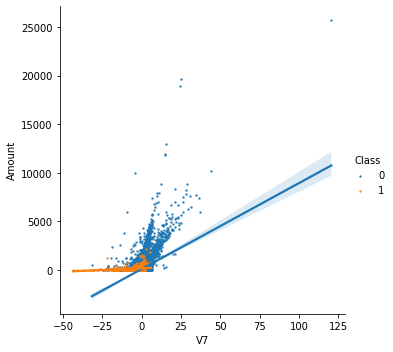

In [19]:
s = sns.lmplot(x='V20', y='Amount',data=dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

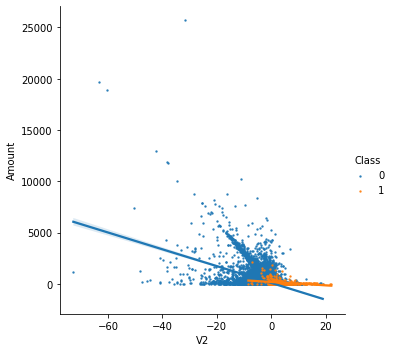

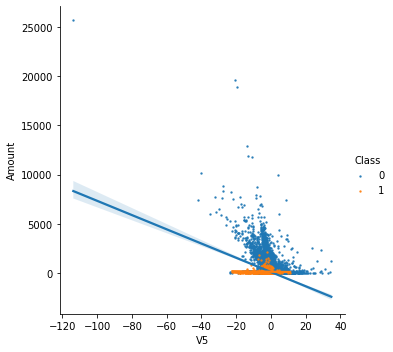

In [20]:
s = sns.lmplot(x='V2', y='Amount',data=dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

# Features density plot

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



<Figure size 432x288 with 0 Axes>

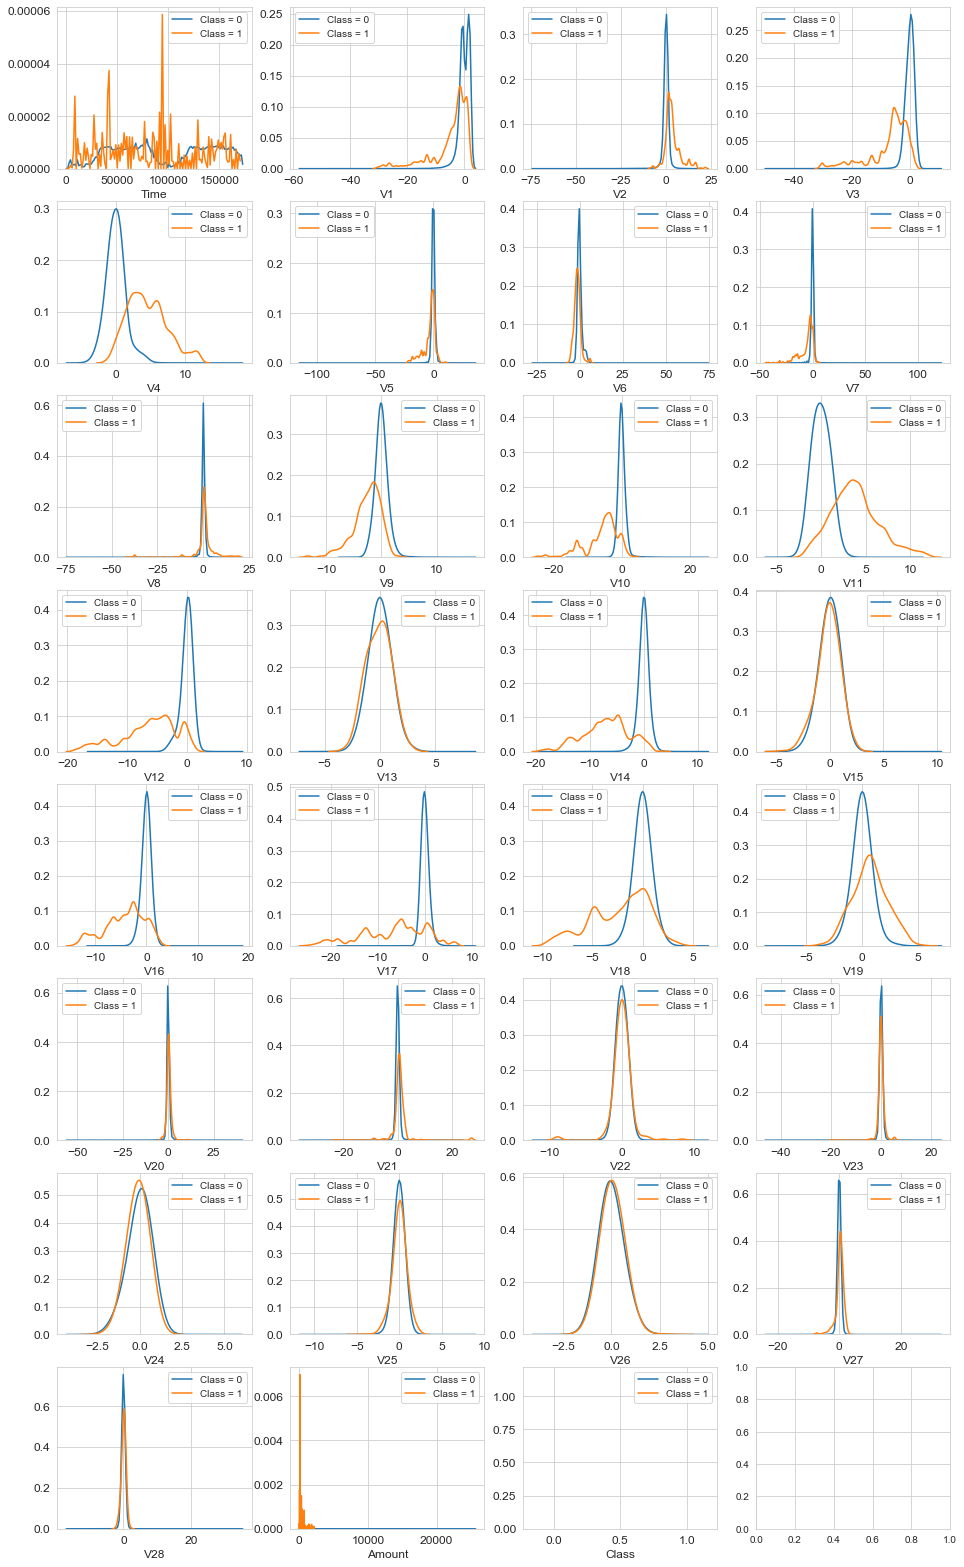

In [21]:
var = dataset.columns.values

i = 0
t0 = dataset.loc[dataset['Class'] == 0]
t1 = dataset.loc[dataset['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

# Predictive models

In [22]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [23]:
train_df, test_df = train_test_split(dataset, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [24]:
train_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46038,42612.0,-0.489771,0.319345,2.053837,0.729095,0.116019,1.800484,0.665996,0.010833,0.963039,-0.069473,-0.186374,0.687982,-0.653740,-1.143153,-2.422838,-0.923921,0.007147,-0.439378,0.945815,-0.096093,-0.452395,-0.573578,-0.246387,-0.848802,-0.011584,-0.591272,-0.423901,-0.469630,87.56,0
257265,158079.0,-0.545212,0.491961,1.224502,-0.347668,0.211771,0.332727,0.397083,0.194546,0.538196,-1.601399,-1.337658,-0.091801,0.091831,-2.008998,-1.074204,0.177374,0.741228,0.543248,-0.134010,0.098790,0.131239,0.578832,-0.460271,0.577854,0.976243,0.873924,-0.083675,-0.037260,54.95,0
282877,171205.0,-1.312171,2.341898,-1.540839,-0.237345,-0.025731,-1.138582,-0.206301,-1.061977,-0.079198,-0.684883,-0.694481,0.691282,1.018141,-0.455387,0.491325,0.214873,0.808935,0.671507,-0.250937,-0.345580,1.867943,0.514204,0.125027,-0.098427,-0.160797,-0.132015,0.180818,0.142101,2.45,0
226150,144511.0,2.029973,0.344478,-2.765664,1.145446,1.469254,-0.068542,0.508288,-0.076486,0.063214,-0.172802,0.091639,-0.090891,-1.046926,-0.686176,-0.854274,0.309002,0.429574,0.969929,0.244854,-0.206726,-0.055396,-0.057849,-0.132486,-0.503708,0.552893,-0.475008,-0.014708,-0.041982,22.45,0
278800,168443.0,1.918104,0.002786,-1.765175,1.238956,0.573995,-0.626490,0.578274,-0.248337,0.000044,0.413549,0.387121,0.762639,-0.552408,0.775144,-1.159544,-0.428339,-0.479953,-0.015264,0.176523,-0.201929,0.105351,0.379365,-0.092963,-0.394964,0.445427,-0.490657,-0.029533,-0.067947,55.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64434,51145.0,-0.898731,-0.064732,1.184601,0.196442,2.435108,4.041210,-0.932042,1.237936,-0.058540,-0.389705,-0.618639,-0.075845,-0.016307,-0.224922,0.793545,-0.106054,-0.318344,0.699708,1.360003,0.366246,-0.008669,-0.154526,-0.191093,1.008195,0.387983,-0.212567,0.120716,0.099688,9.99,0
164469,116737.0,1.128220,-1.701569,-0.892817,0.501977,-0.503090,0.880431,-0.268431,0.254330,1.373592,-0.511491,-0.190614,0.557364,-0.127653,0.244658,1.966587,-0.708502,0.238256,-0.951578,-1.588141,0.417951,0.538263,0.991945,-0.118235,-1.020177,-0.440175,-0.503295,0.039319,0.021074,383.87,0
256083,157531.0,1.953158,-0.532874,-0.044464,0.619915,-1.195339,-0.880123,-0.726678,-0.015986,1.429566,0.044273,-0.821282,-0.177587,-1.204092,0.018268,0.455253,0.252498,-0.254381,0.011156,-0.419332,-0.284373,0.175710,0.664667,0.230608,0.483426,-0.381663,0.544380,-0.027181,-0.044800,11.50,0
217751,141018.0,-1.024344,0.830423,-1.837306,1.455775,0.399188,-0.898847,2.087792,-0.376099,-1.753964,-0.622154,0.063710,0.078113,0.975083,-0.263547,1.098761,-1.391334,2.090514,0.191716,2.471068,0.258383,0.346767,1.082240,-0.464619,1.246238,0.297855,1.264712,0.054034,-0.139152,276.70,0


In [25]:
test_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
132514,80015.0,-1.130231,0.716230,0.560581,-0.818383,0.012762,-1.456391,0.989268,0.128520,-0.853739,-1.039166,-0.713705,-0.243079,-0.506488,0.776756,0.178668,0.195175,-0.185786,-0.455213,-0.374366,0.005641,0.138820,-0.026007,-0.064615,0.449277,0.205976,0.926258,-0.193324,-0.023539,79.00,0
231874,146958.0,0.887172,-2.177127,-2.365565,0.406678,-0.194711,-0.116013,0.812617,-0.257809,0.189188,0.061726,0.434397,0.353065,-0.350392,0.825940,0.148839,0.523272,-0.889421,0.611326,0.077098,1.085111,0.591279,0.313482,-0.536556,0.285536,-0.130695,0.701904,-0.220749,0.028341,627.23,0
240972,150826.0,-7.752743,6.396263,-5.797765,-0.932329,-3.551210,-2.022925,-2.709679,4.139447,2.034678,3.275483,-2.088108,1.225883,-0.335911,2.433300,0.530357,0.390995,1.138206,0.255939,-0.601259,0.982050,0.236729,0.775367,0.634039,-0.073460,0.319821,-0.133871,0.843371,0.913733,6.59,0
91983,63715.0,1.039534,-1.071582,0.434023,-0.460506,-1.106821,-0.103705,-0.562238,0.076647,-0.714621,0.558690,1.487741,0.438921,-0.215219,-0.172242,-0.921370,0.444295,0.794159,-1.746052,0.752248,0.275957,0.149235,0.215976,-0.104836,0.253930,0.374193,-0.258005,0.001180,0.024208,141.00,0
225669,144345.0,-9.742090,-8.480402,-3.582175,1.337566,-3.465308,4.292190,5.893034,-1.190614,1.133534,-0.307708,1.259998,0.441839,0.373595,-0.535109,1.038457,1.114926,-0.436689,-1.632488,-0.010320,-4.107211,-2.137572,-1.427034,-2.957343,-0.456807,-0.117976,0.322449,0.407214,2.095218,1690.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257165,158039.0,0.002789,-0.246172,0.432183,-2.192380,0.321394,0.594958,-0.165724,-0.147374,-0.493200,0.775867,0.188588,-0.043540,1.074543,-0.979853,-0.844955,1.465001,-0.705397,-0.464314,0.797087,0.066493,0.366367,1.150766,-0.263079,-0.149359,-0.311047,-0.222004,-0.495862,-0.212742,24.99,0
115726,73987.0,0.759530,-1.499729,-0.140199,-0.103248,-1.434009,-1.148393,0.170556,-0.366259,-0.767968,0.490421,-0.545246,-0.232537,-0.449038,0.231942,0.039227,-1.821787,0.476558,0.628132,-0.684995,0.107093,-0.239469,-0.845891,-0.241272,0.771383,0.251538,1.038934,-0.133217,0.056209,329.22,0
171040,120468.0,2.259764,-0.734422,-1.389639,-1.033465,-0.418561,-0.846343,-0.532008,-0.239758,-0.353969,0.878250,-0.917697,-1.044105,-0.362011,0.068699,0.539118,1.111886,0.044019,-1.139121,0.523265,-0.057297,0.319726,0.884909,0.091144,0.600556,0.092855,-0.057588,-0.037871,-0.058800,2.86,0
8497,11395.0,-0.926167,0.980114,1.304831,-0.753279,-0.437823,-0.813154,0.223754,0.312315,1.492322,-1.458244,-0.146915,-2.031422,1.695126,1.308626,-1.867442,-0.083167,0.755820,-0.348407,-0.482322,-0.116026,-0.149512,-0.034638,-0.089318,0.405738,-0.151419,0.862513,0.127320,0.110361,17.85,0


In [26]:
valid_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
155469,105519.0,-0.168435,0.601389,-1.322941,-0.794262,2.896167,3.723954,0.435124,0.809965,1.158062,-1.714128,1.078275,-2.702908,1.224017,0.211382,-0.238626,-0.569784,2.052114,0.512211,0.787551,0.234410,-0.239745,-0.456969,0.136512,0.527101,-0.516182,-0.011813,0.168090,0.214953,90.44,0
281294,170066.0,2.092300,0.203841,-2.046065,0.122669,0.789151,-1.062546,0.717175,-0.439611,-0.178991,0.187959,0.916904,1.391253,0.884835,0.778020,-0.336214,-0.385091,-0.716251,-0.067471,0.360861,-0.184554,0.150966,0.606347,-0.072265,-0.409973,0.464194,-0.159213,-0.048764,-0.083342,0.78,0
56434,47425.0,-1.408212,-0.882836,0.390427,0.574399,1.269029,-0.063044,-0.731943,0.236889,-1.546301,0.895903,-1.608263,0.031061,1.898230,-0.004821,1.385037,-1.618758,-0.142025,1.337016,0.048649,-0.229639,-0.287221,-0.436730,-0.307574,-1.317261,-0.852841,-0.404340,-0.038040,-0.271116,2.00,0
72882,54896.0,-4.041806,-5.119987,-2.640510,2.247336,-6.579783,3.314741,8.047611,-0.241093,-1.662153,-2.195497,0.555256,-0.544379,-0.676028,1.261108,0.582688,0.678438,-0.525864,1.771286,0.200070,4.791816,1.531356,0.220384,5.260794,-0.292521,0.776425,-0.393686,-0.848520,0.131423,2286.60,0
154497,101749.0,2.094108,0.277972,-1.964250,0.702926,0.868111,-0.324271,0.010622,-0.291076,1.974727,-1.082931,-0.121012,-2.080074,2.767488,-0.552941,-1.189682,0.276199,1.611383,0.587784,-0.039762,-0.094179,-0.223194,-0.059362,-0.023381,-0.067094,0.224319,0.606217,-0.066239,-0.034203,6.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130480,79363.0,1.204442,-0.322163,0.904010,-0.784947,-0.931234,-0.330431,-0.580337,0.046710,1.661364,-1.154275,-0.040975,1.375394,0.971375,-0.325856,1.410815,-0.783427,0.074579,-0.387913,0.190595,-0.091373,0.027161,0.413260,-0.018523,0.126337,0.462274,-0.660345,0.116880,0.034102,1.00,0
157649,110199.0,1.751363,0.337812,0.795262,4.312732,-0.681349,-0.126233,-0.566591,-0.031344,0.919523,0.975130,0.435764,-2.215696,1.914571,1.152562,-1.374657,0.823981,0.175329,-0.048331,-2.389422,-0.289943,0.160071,0.803841,0.253569,0.807457,-0.340069,-0.006557,-0.008133,-0.025072,29.58,0
166897,118373.0,1.706178,-0.022064,-0.371768,3.903360,0.137307,0.913564,-0.274172,0.272305,-0.430786,1.438444,-0.102608,0.313472,-0.851766,0.005142,-2.532846,0.628332,-0.609697,0.139888,-0.996655,-0.171226,0.170397,0.501554,0.048373,0.756151,0.037669,0.072770,-0.030270,-0.037863,77.71,0
173301,121432.0,-1.245628,0.797699,1.524232,-0.621050,-1.224624,-0.017876,-0.303114,0.563961,1.126998,-0.727933,-1.349329,-0.155088,-0.505881,-0.191550,0.722093,0.619903,-0.615697,0.726915,-0.698540,-0.258943,0.348105,1.041386,-0.075846,-0.019701,-0.504851,-0.332825,-0.025192,0.179319,63.19,0


# RandomForestClassifier :

In [27]:
 clf = RandomForestClassifier(n_jobs=NO_JOBS,                           
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)                            

In [28]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

In [29]:
preds = clf.predict(valid_df[predictors])

In [30]:
from joblib import dump
dump(clf,'clf.save')

['clf.save']

In [31]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))

# Features importance

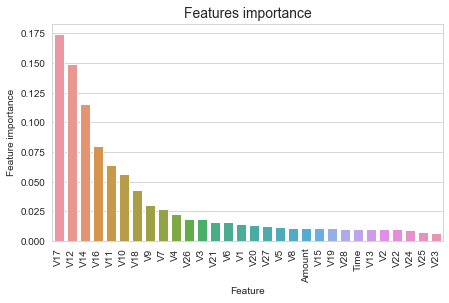

In [32]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

# Confusion matrix

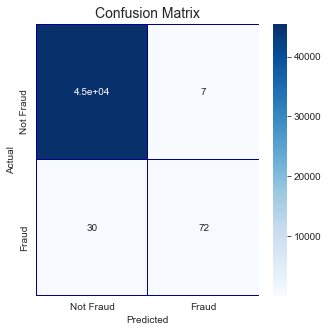

In [33]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Area under curve

In [34]:
roc_auc_score(valid_df[target].values, preds)

0.8528641975628091

# AdaBoostClassifier :

In [35]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,   #Prepare the model
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

# Fit the model

In [36]:
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=2018)

# Predict the target values

In [37]:
preds = clf.predict(valid_df[predictors])

# Features Importance

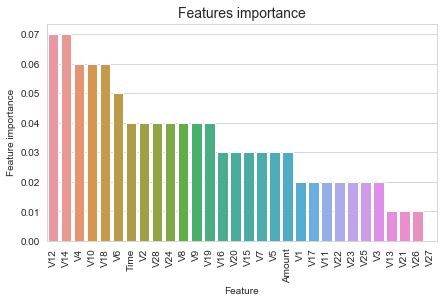

In [38]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

# Confusion matrix

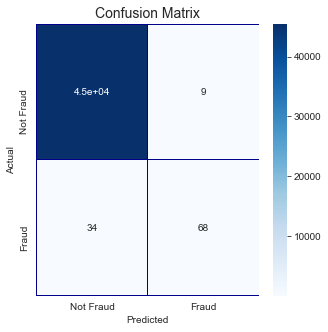

In [39]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Area under curve

In [40]:
roc_auc_score(valid_df[target].values, preds)

0.8332343604519027

# CatBoostClassifier :

In [41]:
clf = CatBoostClassifier(iterations=500,                    #Prepare the model
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)

In [42]:
clf.fit(train_df[predictors], train_df[target].values,verbose=True)

0:	total: 1.41s	remaining: 11m 43s
50:	total: 51.2s	remaining: 7m 30s
100:	total: 1m 37s	remaining: 6m 26s
150:	total: 2m 22s	remaining: 5m 28s
200:	total: 3m 9s	remaining: 4m 42s
250:	total: 3m 54s	remaining: 3m 52s
300:	total: 4m 42s	remaining: 3m 6s
350:	total: 5m 30s	remaining: 2m 20s
400:	total: 6m 19s	remaining: 1m 33s
450:	total: 7m 6s	remaining: 46.4s
499:	total: 7m 55s	remaining: 0us


# Predict the target values

In [43]:
preds = clf.predict(valid_df[predictors])

# Features importance

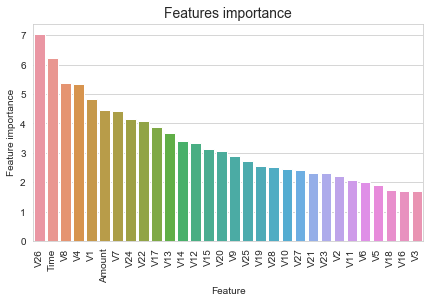

In [44]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

# Confusion matrix

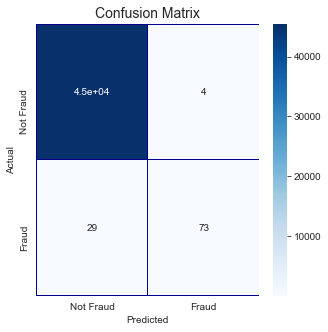

In [45]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Area under curve

In [46]:
roc_auc_score(valid_df[target].values, preds)

0.8577991493075996

# XGBoost :

In [47]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [48]:
model = xgb.train(params,        #Train the model
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[11:52:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.89296	valid-auc:0.85272
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.93947	valid-auc:0.88200
[100]	train-auc:0.94415	valid-auc:0.89094
[150]	train-auc:0.97837	valid-auc:0.96362
[200]	train-auc:0.99002	valid-auc:0.98397
[250]	train-auc:0.99382	valid-auc:0.98592
[300]	train-auc:0.99567	valid-auc:0.98667
Stopping. Best iteration:
[282]	train-auc:0.99517	valid-auc:0.98706



# Plot variable importance

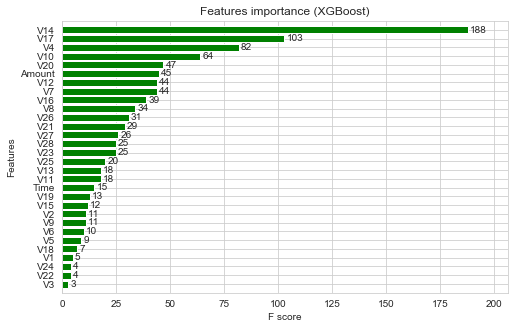

In [49]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

# Predict test set

In [50]:
preds = model.predict(dtest)

# Area under curve

In [51]:
roc_auc_score(test_df[target].values, preds)

0.9766700080897612

# LightGBM :

In [52]:
params = {                                          #Defining model parameters
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced 
         }

In [53]:
dtrain = lgb.Dataset(train_df[predictors].values,     #Prepare the model
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)

In [54]:
evals_results = {}                      #Run the model

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=2*EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)


Training until validation scores don't improve for 100 rounds
[50]	train's auc: 0.97289	valid's auc: 0.967126
[100]	train's auc: 0.987513	valid's auc: 0.972525
[150]	train's auc: 0.988872	valid's auc: 0.93531
Early stopping, best iteration is:
[85]	train's auc: 0.987093	valid's auc: 0.974528


# Features importance

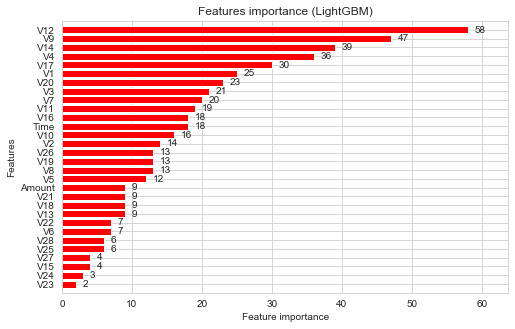

In [55]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

# Predict test data

In [56]:
preds = model.predict(test_df[predictors])

# Area under curve

In [57]:
roc_auc_score(test_df[target].values, preds)

0.9459470296507333

# Training and validation using cross-validation

In [58]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)

# Create arrays and dataframes to store results
oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()
n_fold = 0
for train_idx, valid_idx in kf.split(train_df):
    train_x, train_y = train_df[predictors].iloc[train_idx],train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[predictors].iloc[valid_idx],train_df[target].iloc[valid_idx]
    
    evals_results = {}
    model =  LGBMClassifier(
                  nthread=-1,
                  n_estimators=2000,
                  learning_rate=0.01,
                  num_leaves=80,
                  colsample_bytree=0.98,
                  subsample=0.78,
                  reg_alpha=0.04,
                  reg_lambda=0.073,
                  subsample_for_bin=50,
                  boosting_type='gbdt',
                  is_unbalance=False,
                  min_split_gain=0.025,
                  min_child_weight=40,
                  min_child_samples=510,
                  objective='binary',
                  metric='auc',
                  silent=-1,
                  verbose=-1,
                  feval=None)
    model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                eval_metric= 'auc', verbose= VERBOSE_EVAL, early_stopping_rounds= EARLY_STOP)
    
    oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration=model.best_iteration_)[:, 1]
    test_preds += model.predict_proba(test_df[predictors], num_iteration=model.best_iteration_)[:, 1] / kf.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = predictors
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    del model, train_x, train_y, valid_x, valid_y
    gc.collect()
    n_fold = n_fold + 1
train_auc_score = roc_auc_score(train_df[target], oof_preds)
print('Full AUC score %.6f' % train_auc_score)      

Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.962157	valid_1's auc: 0.989338
Early stopping, best iteration is:
[13]	training's auc: 0.968109	valid_1's auc: 0.99314
Fold  1 AUC : 0.993140
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.981643	valid_1's auc: 0.95593
Early stopping, best iteration is:
[10]	training's auc: 0.979098	valid_1's auc: 0.965326
Fold  2 AUC : 0.965326
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.979434	valid_1's auc: 0.943348
Early stopping, best iteration is:
[37]	training's auc: 0.981891	valid_1's auc: 0.945099
Fold  3 AUC : 0.945099
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.972729	valid_1's auc: 0.989338
[100]	training's auc: 0.97498	valid_1's auc: 0.994546
[150]	training's auc: 0.976713	valid_1's auc: 0.994725
Early stopping, best iteration is:
[118]	training's auc: 0.974884	valid_1's auc: 0.995364
Fold  4

In [59]:
pred = test_preds                #The AUC score for the prediction from the test data was 0.93 
                                 #We prepare the test prediction, from the averaged predictions for test over the 5 folds